###Dataset - Chronic Kidney Disease

Chronic Kidney Disease is the gradual loss of function of the kidney with no symptoms being manifested.



Age - Age

BP - Blood Pressure

SG - Specific Gravity

AL - Albumin

SU - Sugar (Glucose)

RBC - Red Blood Cells

PC - Packed Cell Volume

PCC - Pus Cell Casts

BA - Bacteria

BGR - Blood Glucose Random

BU - Blood Urea

SC - Serum Creatinine

SOD - Sodium

POT - Potassium

Hemo - Hemoglobin

PCV - Packed Cell Volume

WC - White Blood Cells

RC - Red Blood Cell Count

HTN - Hypertension

DM - Diabetes Mellitus

CAD - Coronary Artery Disease

Appet - Appetite

PE - Pedal Edema (Swelling in the Feet)

ANE - Anemia


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('/content/kidney_disease.csv')

In [ ]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
data.shape

(400, 26)

In [ ]:
data.tail() #400 rows in total

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
data_dup = data.duplicated().any()
print(data_dup)

False


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [ ]:
#find missing values
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
#imputing missing values
data['age'].fillna(data['age'].median(), inplace = True)
data['bp'].fillna(data['bp'].mean(), inplace = True)
data['sg'].fillna(data['sg'].mean(), inplace = True)
data['al'].fillna(data['al'].mean(), inplace = True)
data['su'].fillna(data['su'].mean(), inplace = True)
data['bgr'].fillna(data['bgr'].mean(), inplace = True)
data['bu'].fillna(data['bu'].mean(), inplace = True)
data['sc'].fillna(data['sc'].mean(), inplace = True)
data['sod'].fillna(data['sod'].mean(), inplace = True)
data['pot'].fillna(data['pot'].mean(), inplace = True)
data['hemo'].fillna(data['hemo'].mean(), inplace = True)

In [ ]:
mode = data['rbc'].mode()[0]
data['rbc'].fillna(mode, inplace=True)
data['pc'].fillna(mode, inplace=True)
data['ba'].fillna(mode, inplace=True)
data['pcc'].fillna(mode, inplace=True)
data['pe'].fillna(mode, inplace=True)
data['pcv'].fillna(mode, inplace=True)
data['wc'].fillna(mode, inplace=True)
data['rc'].fillna(mode, inplace=True)
data['htn'].fillna(mode, inplace=True)
data['dm'].fillna(mode, inplace=True)
data['cad'].fillna(mode, inplace=True)
data['appet'].fillna(mode, inplace=True)
data['ane'].fillna(mode, inplace=True)

In [ ]:
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
#find unique values
for i in data.columns: #data.columns gives you names of all columns
  print('*****',i,'*****') #since for loop is running, it will iterate through all columns
  print()
  print(set(data[i].tolist())) #include set funtion, so that it takes iterable (like a list) and returns a set containing unique elements
  print()

***** id *****

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

In [ ]:
#correcting wrong values
print(data['rc'].mode())
print(data['wc'].mode())
print(data['pcv'].mode())

0    normal
Name: rc, dtype: object
0    normal
Name: wc, dtype: object
0    normal
Name: pcv, dtype: object


In [ ]:
data['classification']=data['classification'].replace('ckd\t','ckd')
data['dm']=data['dm'].replace('\tno','no')
data['cad']=data['cad'].replace('\tno','no')
data['dm']=data['dm'].replace('\tyes','yes')
data['dm']=data['dm'].replace(' yes','yes')
data['rc']=data['rc'].replace('\t?','5.2')
data['wc']=data['wc'].replace('\t6200','9800')
data['wc']=data['wc'].replace('\t8400','9800')
data['wc']=data['wc'].replace('\t?','9800')
data['pcv']=data['pcv'].replace('\t43','41')
data['pcv']=data['pcv'].replace('\t?','41')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,normal,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,normal,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

Axes(0.125,0.11;0.775x0.77)


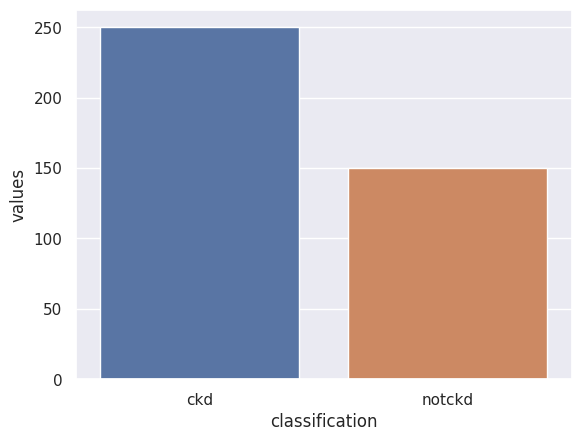

In [ ]:
temp = data['classification'].value_counts()
temp_df = pd.DataFrame({'classification': temp.index,'values': temp.values})
print(sns.barplot(x = 'classification', y = 'values', data = temp_df)) #count of patients having kidney disease and patients not having a kidney disease

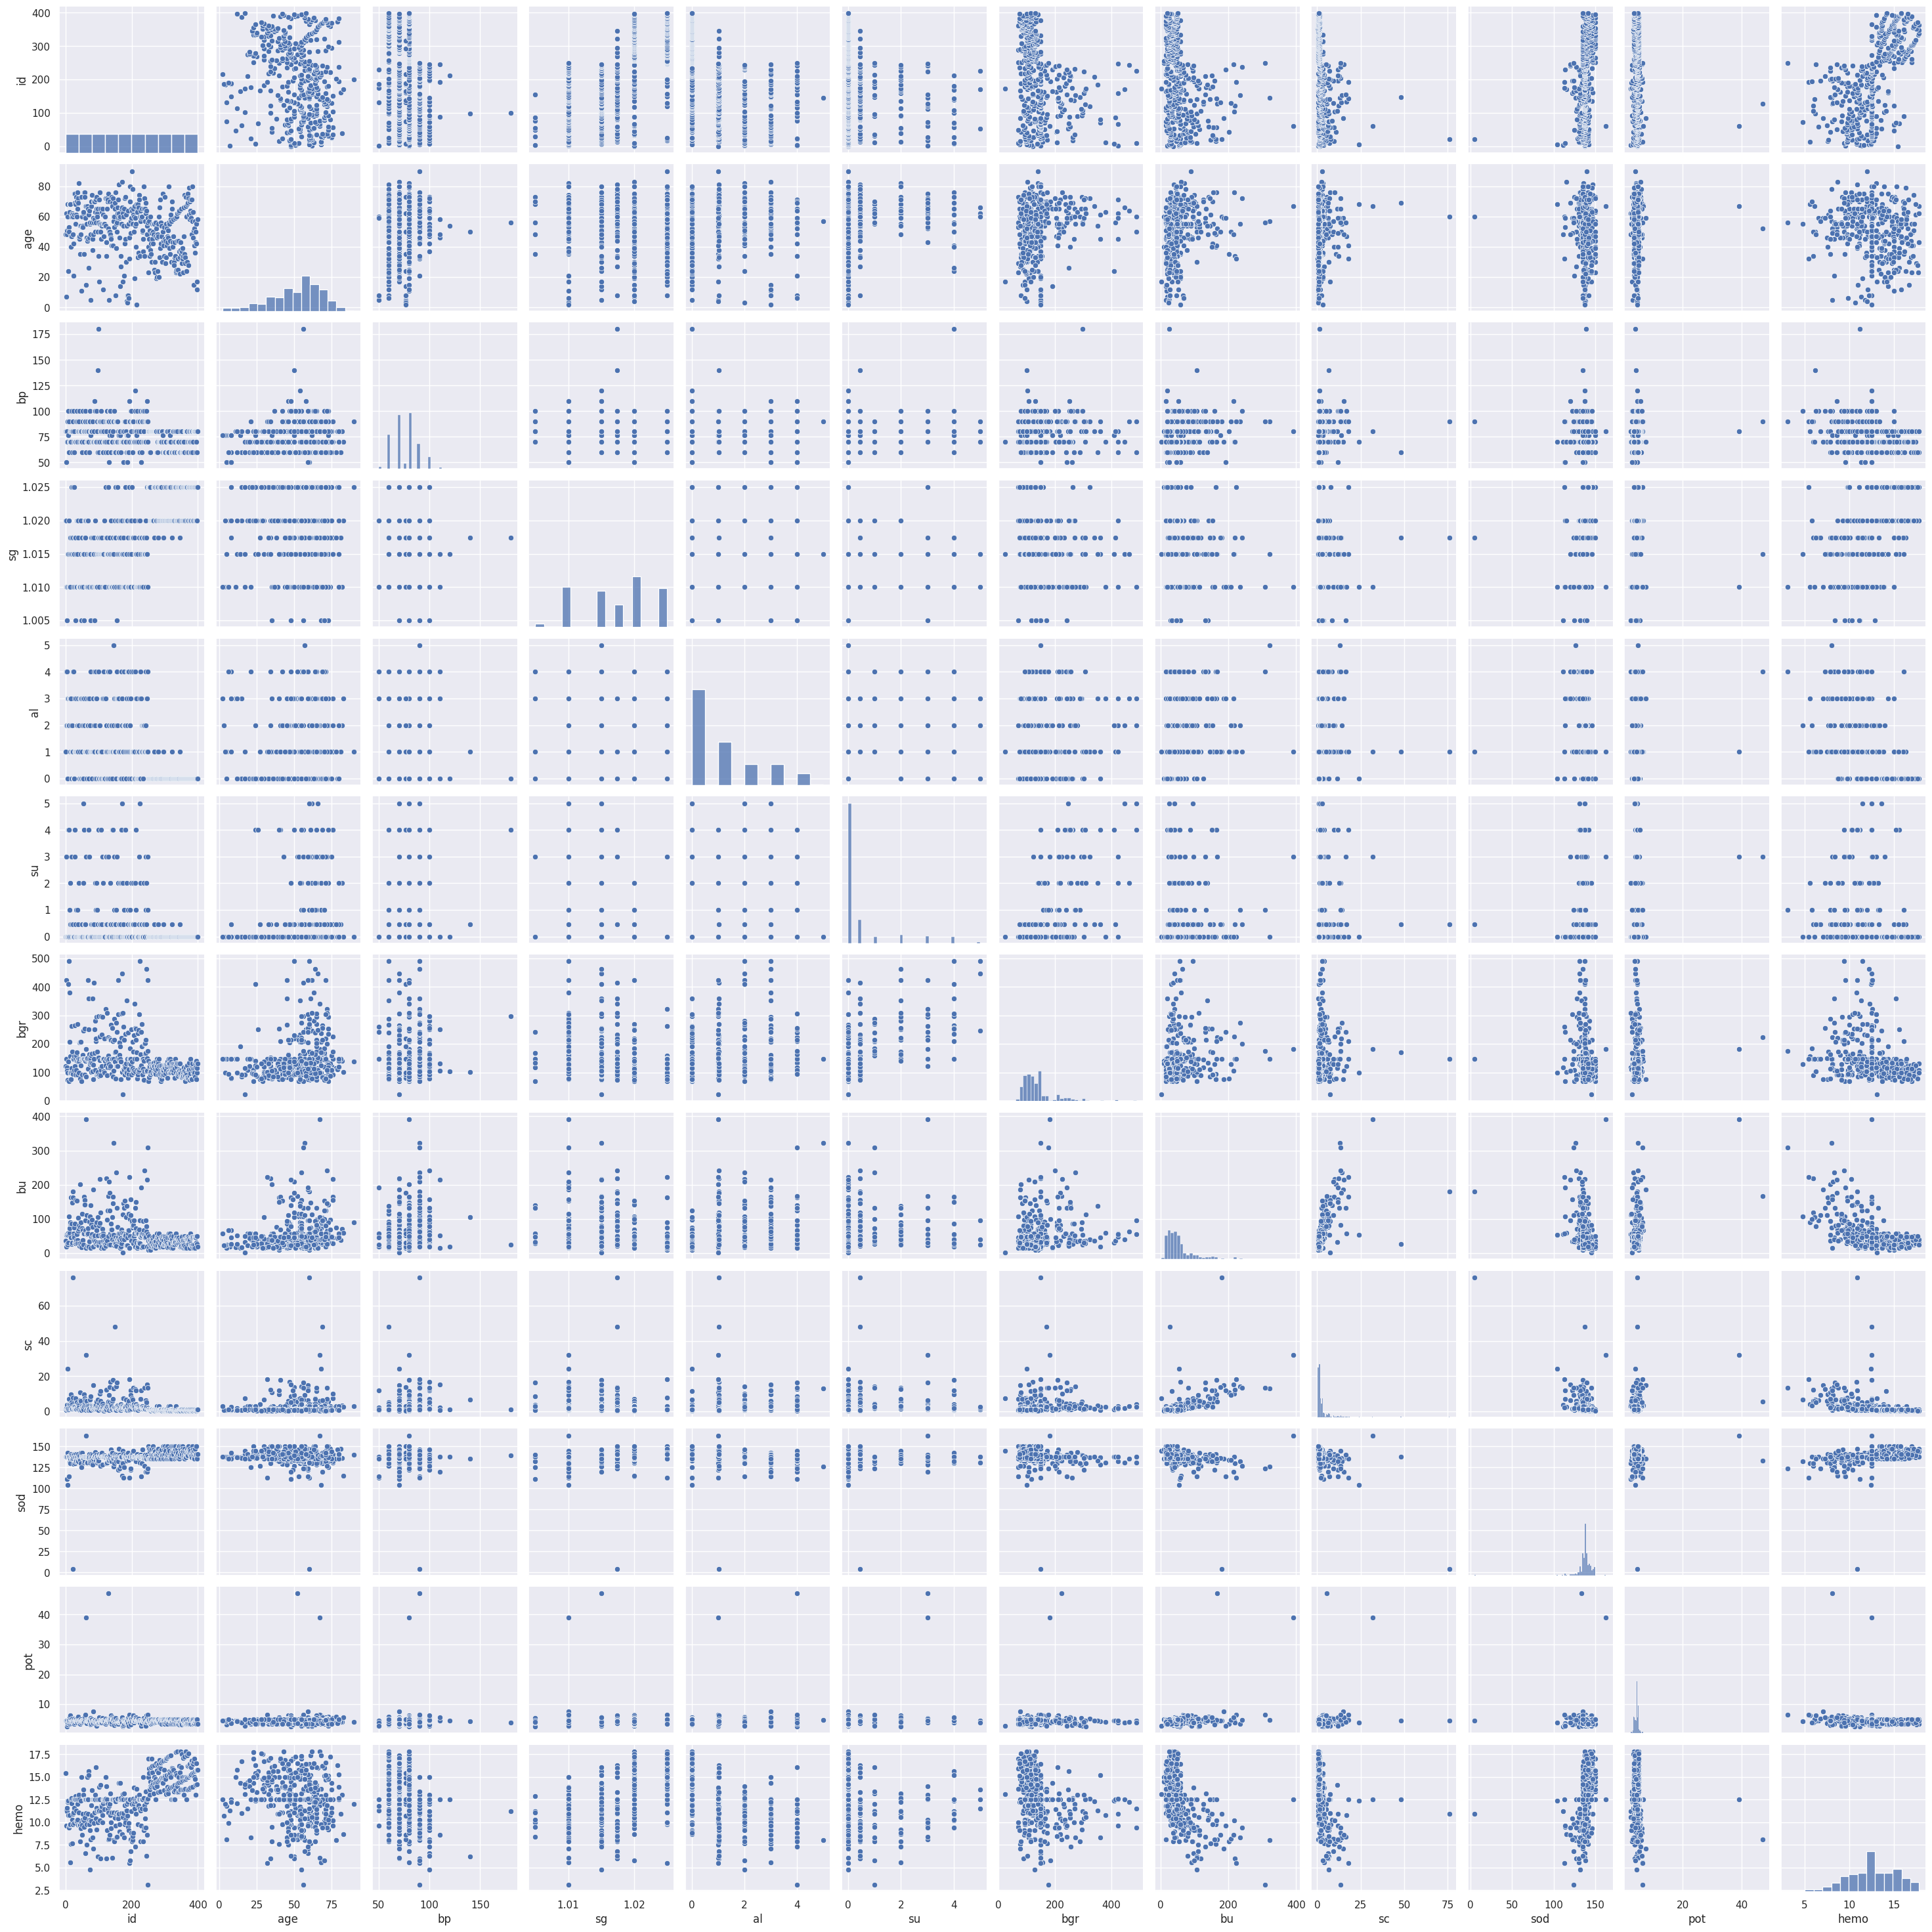

In [ ]:
sns.pairplot(data) #plots every part of the attribute
#mostly the columns which have straight line, are categorical values and the ones which show scatters are numerical values

<ipython-input-20-6e361e3f4c4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


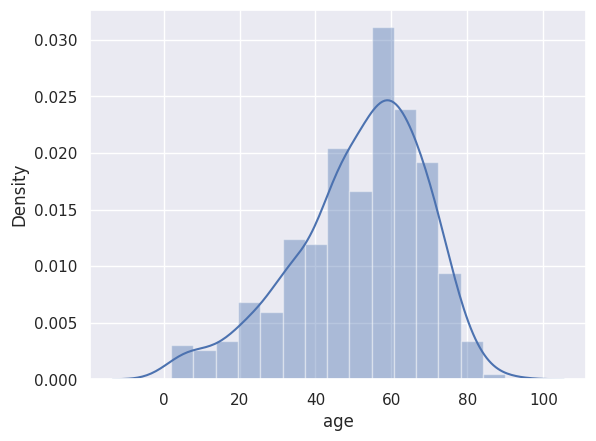

<ipython-input-20-6e361e3f4c4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


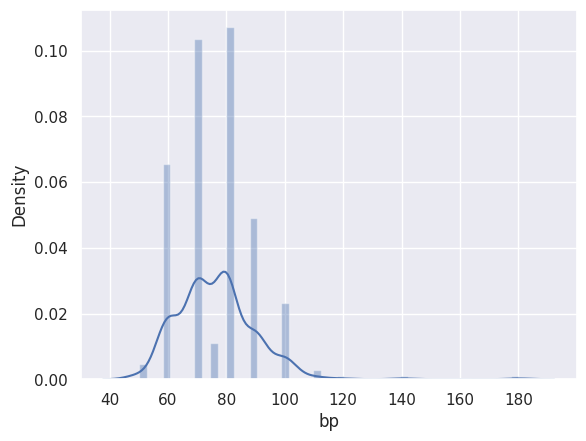

<ipython-input-20-6e361e3f4c4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


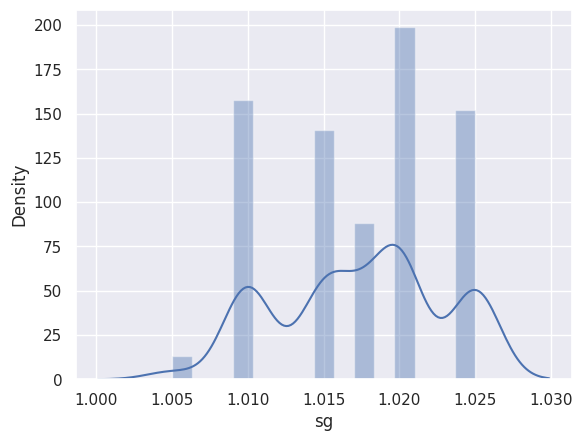

<ipython-input-20-6e361e3f4c4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


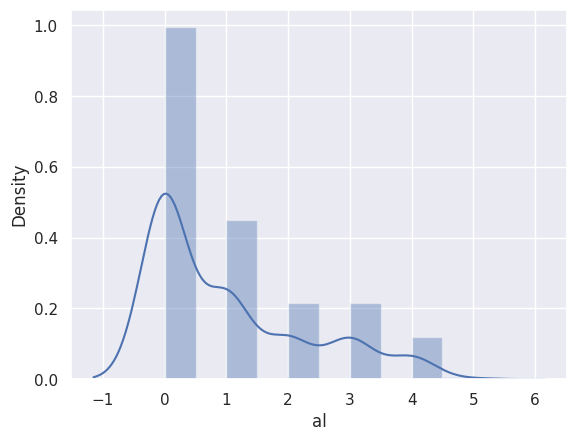

<ipython-input-20-6e361e3f4c4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


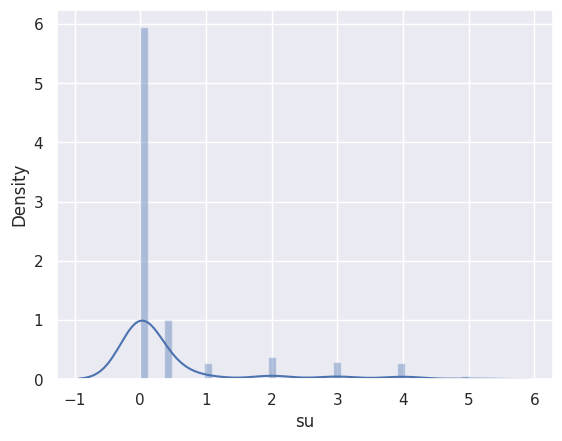

<ipython-input-20-6e361e3f4c4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


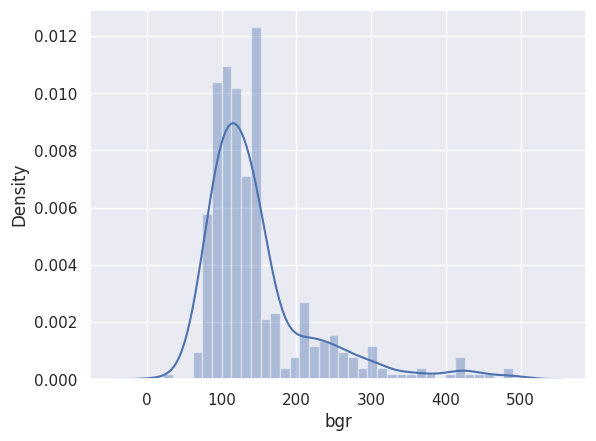

<ipython-input-20-6e361e3f4c4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


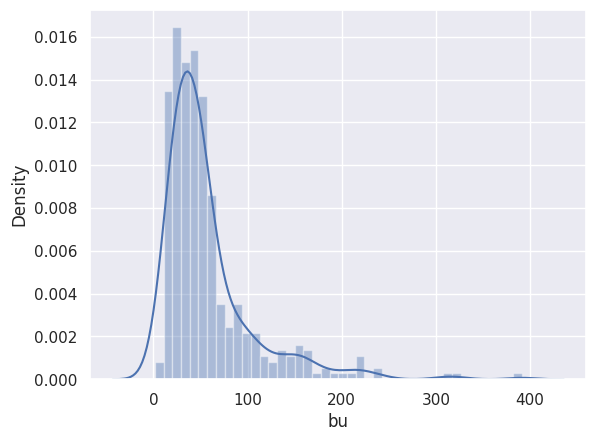

<ipython-input-20-6e361e3f4c4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


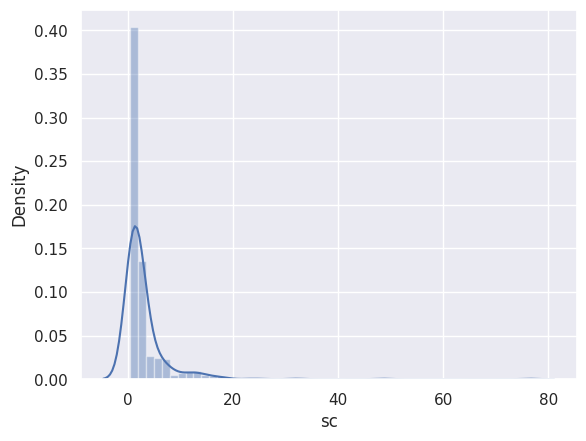

<ipython-input-20-6e361e3f4c4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


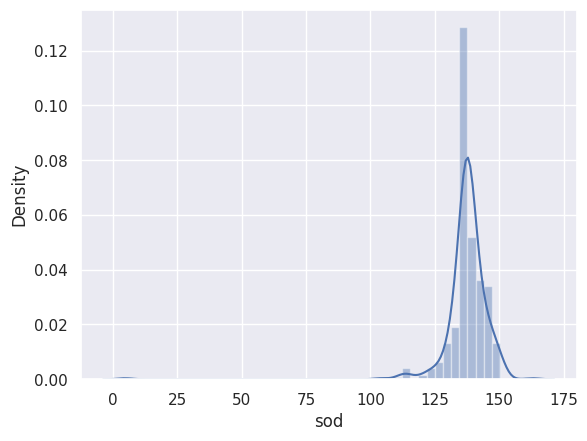

<ipython-input-20-6e361e3f4c4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


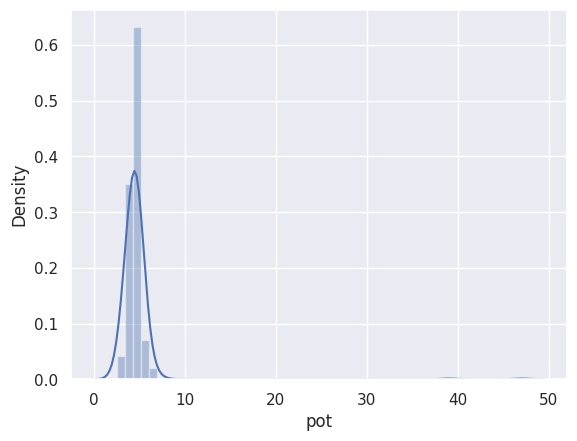

<ipython-input-20-6e361e3f4c4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


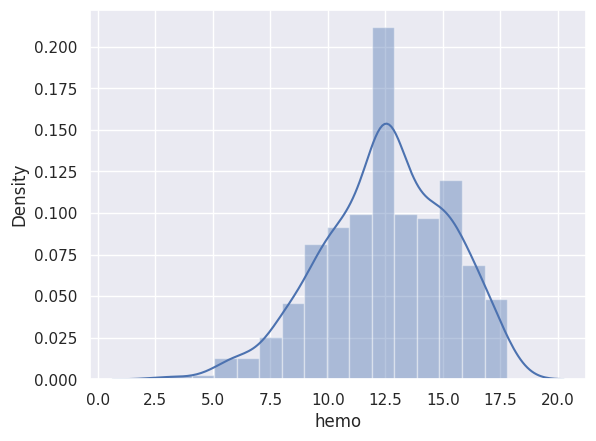

In [ ]:
#to find distribution across the dataset
#loop through column names and exclude the object data type
def distplot(col):
  sns.distplot(data[col])
  plt.show()

for i in list(data.select_dtypes(exclude=['object']).columns)[1:]:
  distplot(i)

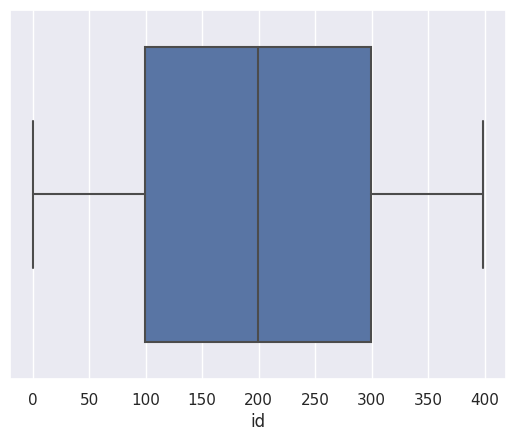

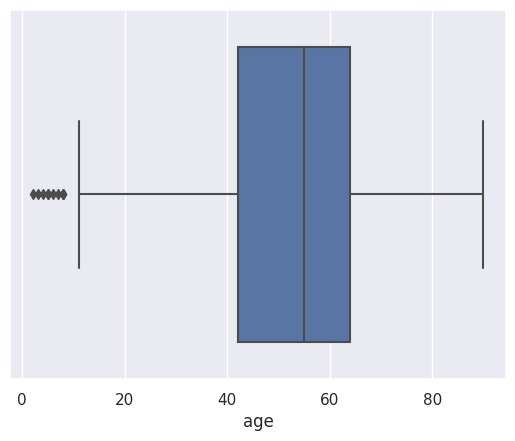

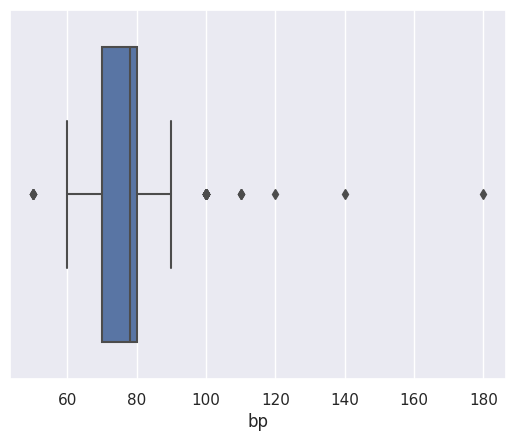

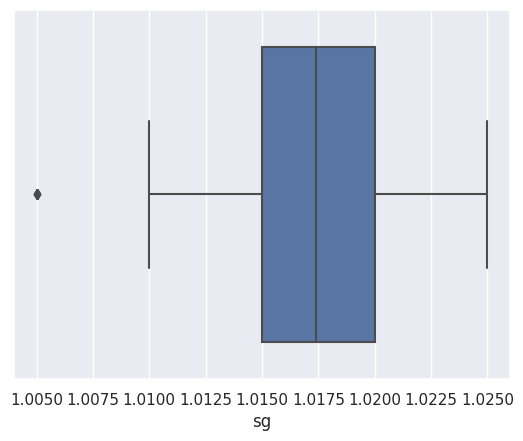

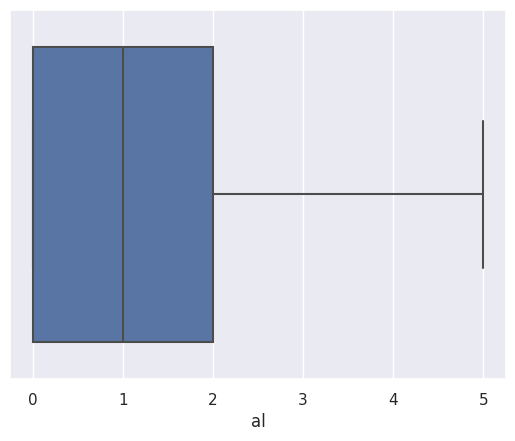

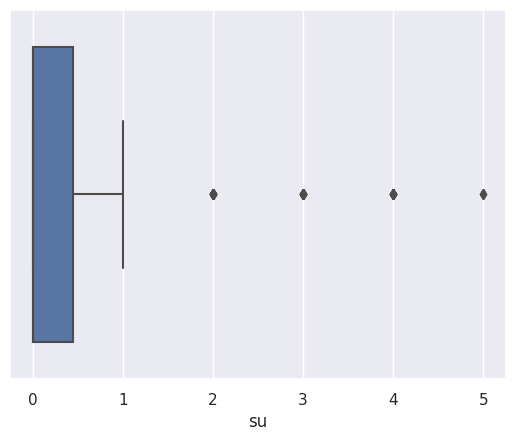

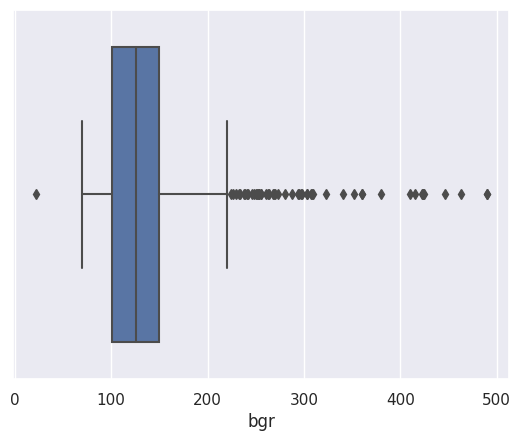

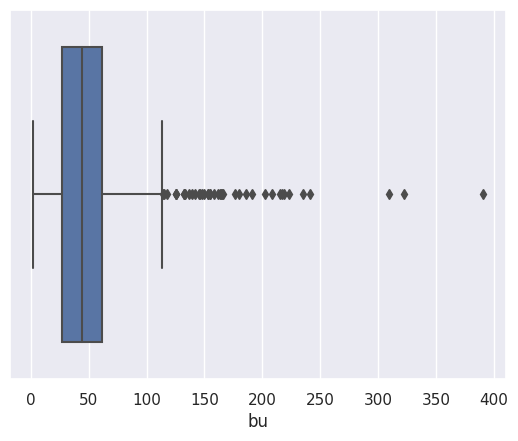

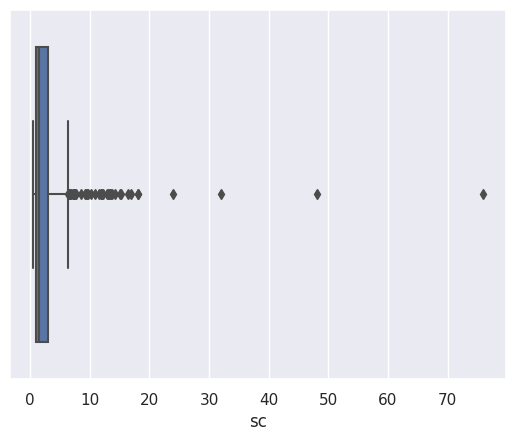

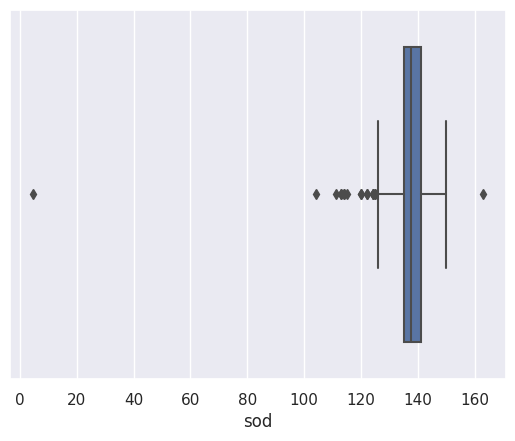

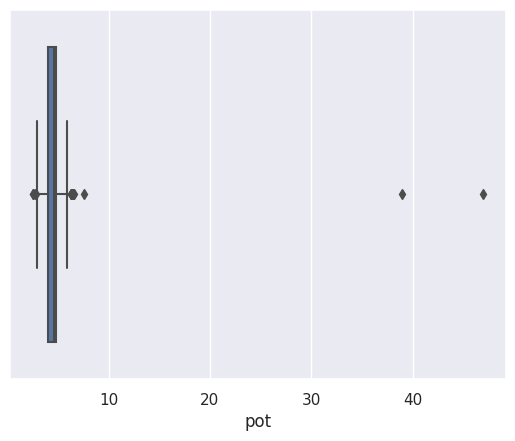

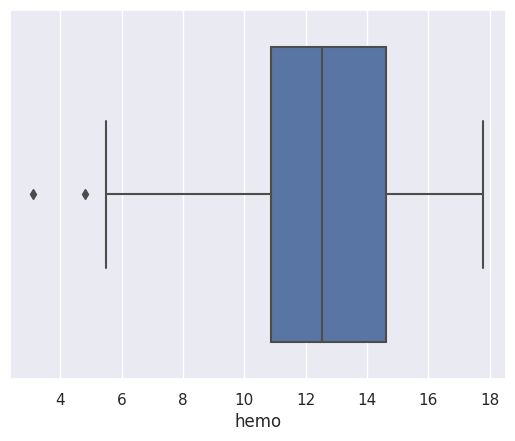

In [ ]:
#Find outliers
for column in data.columns:
    if data[column].dtype in [int, float]:  # Check if the column contains numerical data
        sns.boxplot(x=data[column])
        plt.xlabel(column)
        plt.show()

In [ ]:
#encoding data - to convert categorical values to numerical
from sklearn import preprocessing

df_enco = data.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,4,4,1,0,1,1,1,1,...,30,69,33,2,2,0,0,0,0,0
1,1,5,0,4,5,0,1,1,1,1,...,24,53,48,0,0,0,0,0,0,0
2,2,54,4,1,3,4,1,1,1,1,...,17,67,48,0,2,0,2,0,2,0
3,3,40,2,0,5,0,1,0,2,1,...,18,59,18,2,0,0,2,2,2,0
4,4,43,4,1,3,0,1,1,1,1,...,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,4,4,0,0,1,1,1,1,...,33,59,29,0,0,0,0,0,0,1
396,396,34,2,5,0,0,1,1,1,1,...,40,69,43,0,0,0,0,0,0,1
397,397,8,4,4,0,0,1,1,1,1,...,35,58,35,0,0,0,0,0,0,1
398,398,11,1,5,0,0,1,1,1,1,...,37,64,40,0,0,0,0,0,0,1


In [ ]:
#different parameters distribution as per classification variable
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

<Axes: xlabel='htn', ylabel='count'>

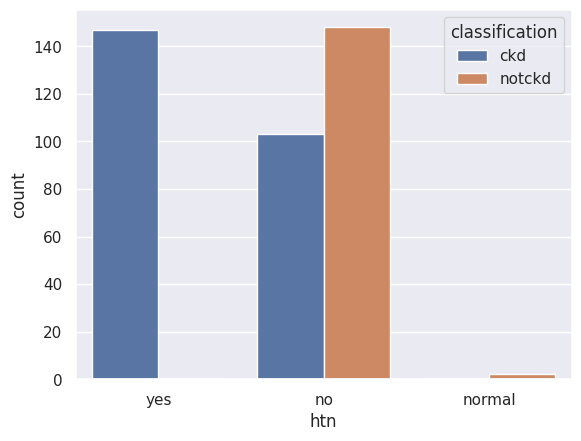

In [ ]:
sns.countplot(x='htn', hue='classification', data=data)

<Axes: xlabel='dm', ylabel='count'>

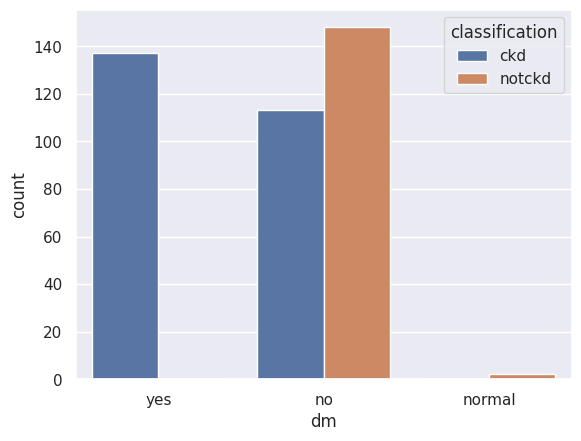

In [ ]:
sns.countplot(x='dm', hue='classification', data=data)

<Axes: >

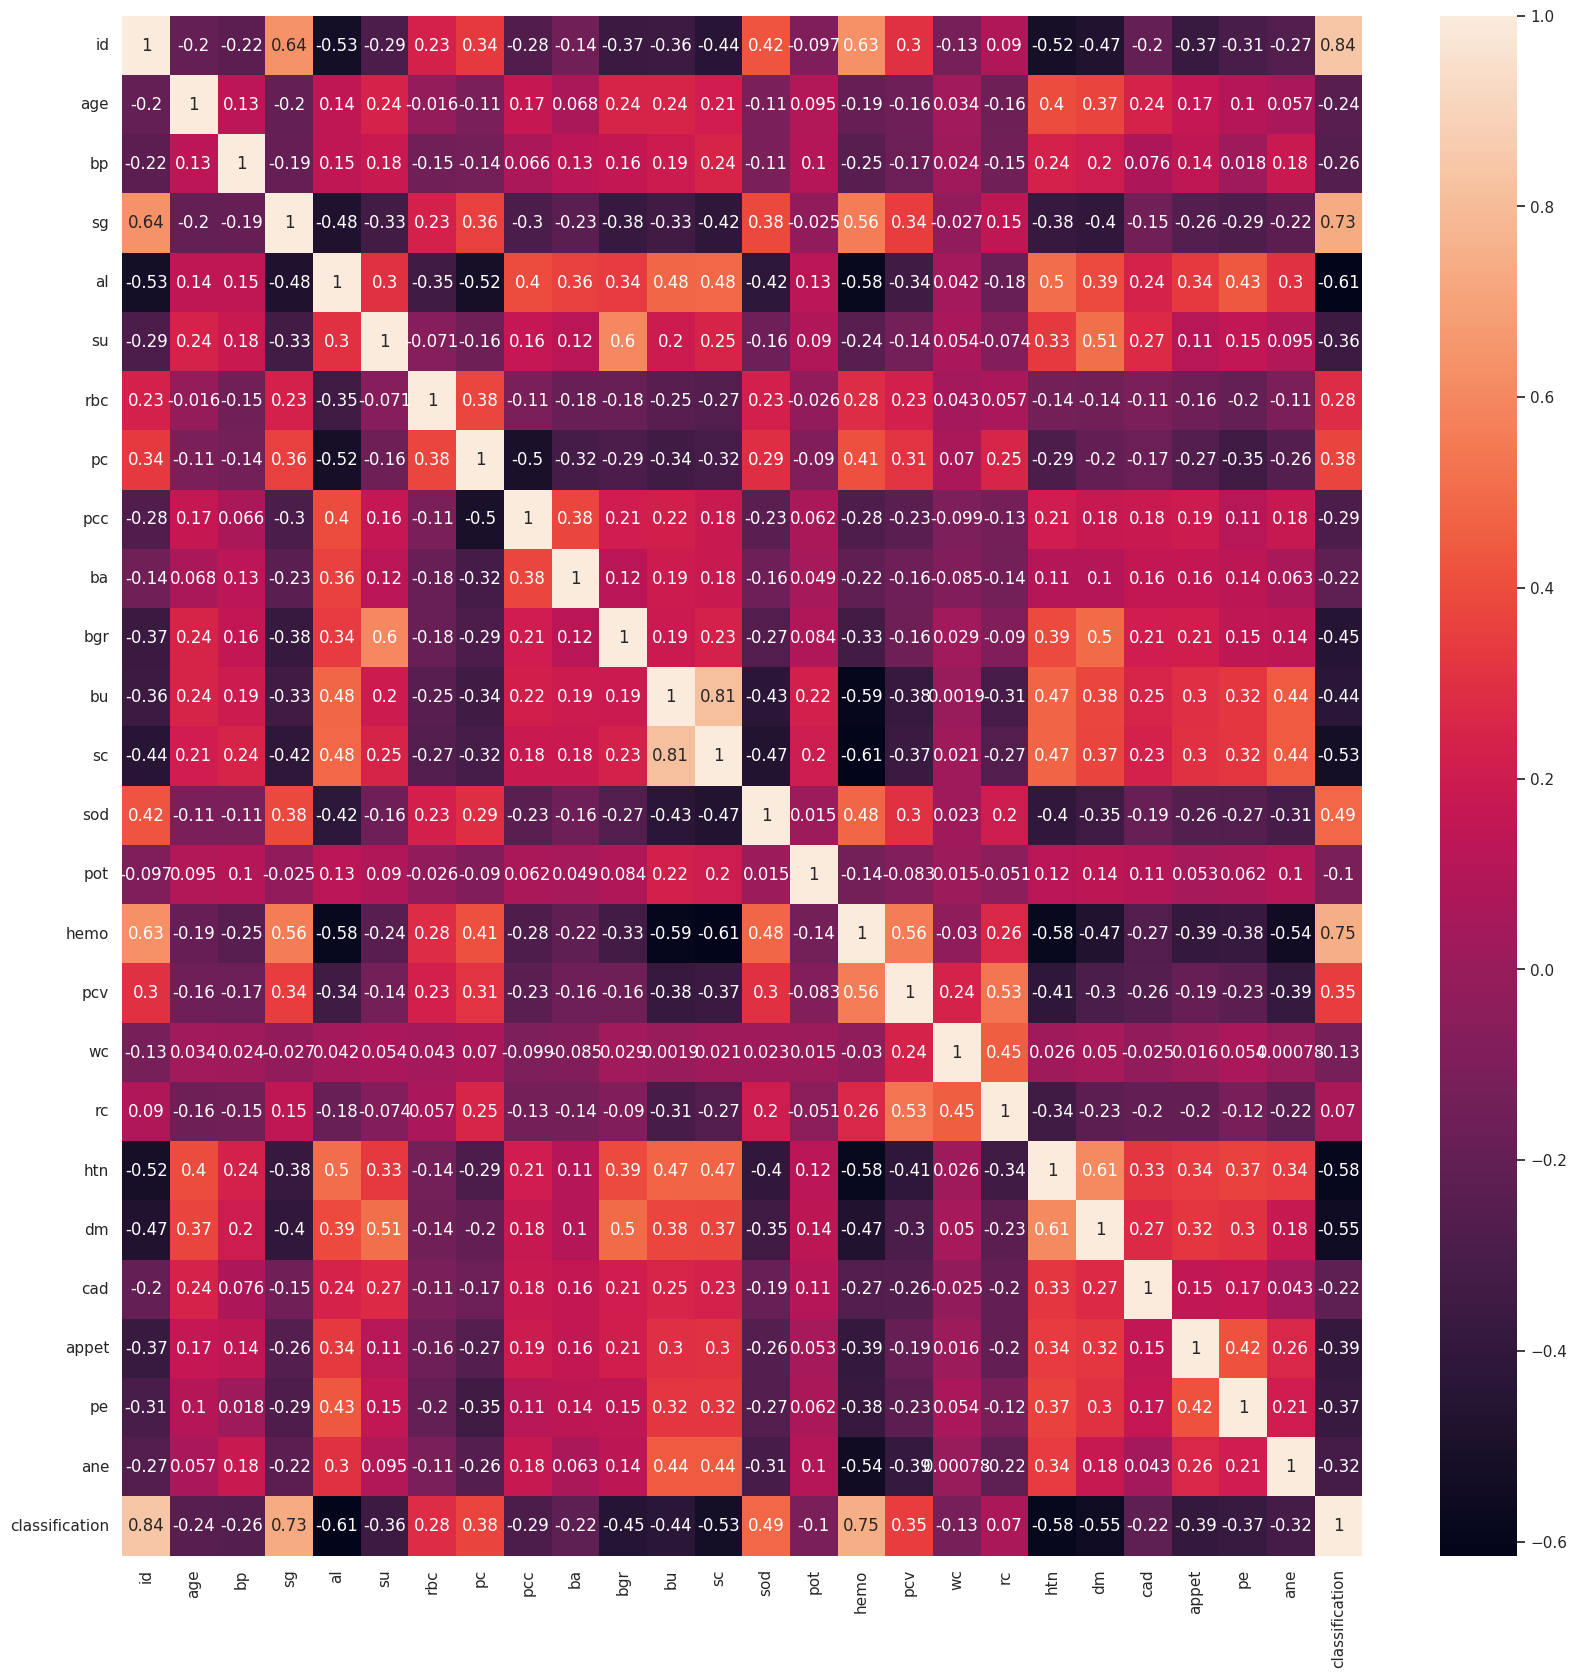

In [ ]:
#finding correlations

plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr,annot=True)

Observation - no high correlation between any independent variables, therefore no columns are to be dropped as such.

In [ ]:
#x is independent variable  and y is dependent
# separating the variables and dropping the 'Id' column

x=df_enco.drop(['id','classification'],axis=1)
y=df_enco['classification']

In [ ]:
#to balance the labels
# since there is imbalanced data here, we have to balance the label

###Balance data labels:

What is Imbalaced Data and what happens in such a case?

-- When a dataset exhibits label imbalance, it means that the distribution of classes or labels is not equal, with some classes having significantly more instances than others.

How does it affect the machine model's perfomance?

-- Machine learning models tend to favor the majority class because they aim to maximize overall accuracy. As a result, they may perform poorly on minority classes, which are underrepresented in the dataset.

-- A classifier can have high accuracy by simply predicting the majority class for all instances, resulting in high precision and low recall for the minority class.

-- The imbalance can lead to convergence issues, slow training, or difficulty in finding a good solution during optimization.

In [ ]:
# to address the above issue, we'll use RESAMPLING technique.

2 Types

1. Oversampling

2. Undersampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({0: 250, 1: 150})


In [ ]:
ros = RandomOverSampler()

x_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [ ]:
#Scaling the features between -1 and 1 to normalize it (MinMax Scalar)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
x=scaler.fit_transform(x_ros)
y=y_ros

In [ ]:
# Dimensionality reduction

# Here sklearn chooses minimum number of important or principal components such that 95% of variance is retained


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(.95)
x_PCA = pca.fit_transform(x)

print(x.shape)
print(x_PCA.shape)

(500, 24)
(500, 18)


This means we will need 18 columns to keep 95% of the variance

###RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.94      0.97        48

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



###DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=20)

# Fit the classifier to the training data
dt_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.94      0.97        48

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (k) as needed

# Fit the classifier to the training data
knn_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        52
           1       0.91      1.00      0.95        48

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [ ]:
data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [ ]:
from sklearn import svm

In [ ]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state = 2)

In [ ]:
classifier = svm.SVC(kernel = 'linear')

In [ ]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
x_train_pred = classifier.predict(x_train)
accuracy_score(x_train_pred, y_train)

0.9975

In [ ]:
test_pred = classifier.predict(x_test)
accuracy_score(test_pred, y_test)

0.98